<a href="https://colab.research.google.com/github/Guilherme-Loss/Repositorio_Guilherme/blob/main/Prova_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fundamentos Computacionais para Engenharia
##Segunda Avaliação
###Guilherme Loss Gambert Santos
---

- Questão 1:

a) A Programação Orientada a Equações se difere da Programação Imperativa nos seguintes quesitos: foco, estrutura, estado, controle, aplicação. O foco se difere uma vez que a POE busca resolvar relações entre variáveis, sua estrutura é um conjunto de equações declarativas, possui variáveis mutáveis definidas por relações  e é aplicada em modelagem matemática e simulações. N POE, o programador atua com modelagem e é responsável pela obtenção da solução, o que difere da Programação Imperativa, onde o programador controla o fluxo de execução. As resoluções são obtidas através de ferramentas de computação, como Simulink e Julia.

b) A Programação Orientada a Equações é geralmente recomendada a problemas que envolvem equações diferenciais e problemas algébricos complexos e problemas que recorrem a modelagem e simulação e resolução de sistemas dinâmicos complexos(EDOs e EDPs). Um exemplo prático da utilização de POE seria na criação de uma simulaçõa de um trocador de calor com finalidade de se obter o perfil de temperatura.

C) A flexibilidade na POE reside em modelos de programas que podem ser reutilizados para resolver diferentes variáveis. Esse princípio é importante para o Engenheiro Químico uma vez que permite execução de processos em diversas situações, o que permite ver a vantagem econômica, segurança e aplicabilidade do processo.



- Questão 2:

a) A estrutura @dataclass tem a função de agrupar varáveis em uma única classe. Em sistemas com muitos parâmetros de entrada é útil para melhorar a legibilidade, agrupar as variáveis selecionadas e evitar erros com ordem dos argumentos.

b) Salvar o código no repositório GitHub é importante para o controle de versões do código e sua reprodutibilidade, compartilhamento online com pessoas interessadas no código e Integração com notebooks de simulação.

---

- Questão 3:

Fermentação alcoólica com cinética dependente da temperatura - Um processo em
batelada converte glicose em etanol e CO2. A taxa de consumo da glicose depende da temperatura segundo a expressão:

     k(T) = 464.8 · exp(−3985/(T(◦C) + 273)) [L/min]

A cinética é de primeira ordem, tal que:

   dS/dt = −k(T) · S

Considerando concentração inicial S(t = 0) de glicose igual a 100 g/L e temperatura constante de 35°C, implemente uma solução computacional para simular a concentração de glicose ao longo de 24 horas. Qual o valor final da concentração de glicose? O que acontece se a temperatura for aumentada para 50°C?


---

- Questão 4:

Equilíbrio em coluna de destilação com seletividade dependente da temperatura - Um processo modelado com três estágios separa uma mistura etanol/água. A fração molar líquida de etanol (xi) e a temperatura (Ti) em cada estágio são conhecidas. O equilíbrio líquido-vapor é dado por:

   yi =(α(Ti) · xi)/(1 + [α(Ti) − 1] · xi)

com a seguinte expressão linear para a seletividade α(T) = 2.5 − 0.01 · (T − 78). Os dados para os três estágios são:

Escreva um código modular que calcule e exiba a seletividade αi em cada estágio e a fração yi com base nos dados acima.

A Concentração para um temperatura de 35 ºC é S = 20.01 g/L
A Concentração para um temperatura de 50 ºC é S = 5.31 g/L


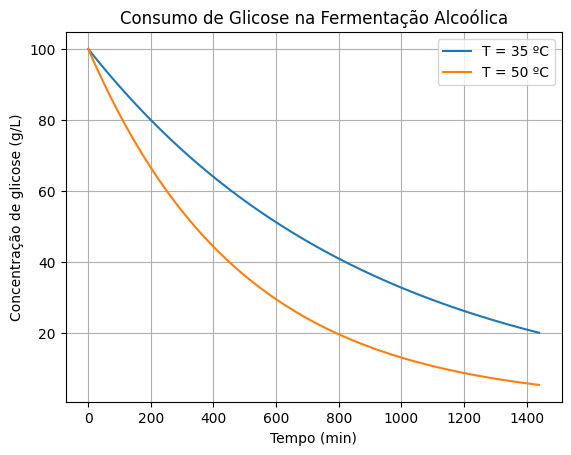

In [13]:
#Questão 3

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from dataclasses import dataclass

#Definir a classe
@dataclass
class Batelada_parametros:
  T: float = 35 #Temperatura Constantem em ºC
  S0: float = 100 #Concentração inicial em g/L

#Definir o modelo da batelada
def modelo_batelada(t, S, parametros):
  T = parametros.T
  kT = 464.8 * np.exp(-3985/(T + 273))
  dSdt = -kT * S
  return dSdt

#Definir a função da simulação através da resoluçaõ da Equação Diferencial
def simulacao(tempo, parametros):
  S0= parametros.S0
  teval = np.linspace(tempo[0], tempo[-1],1440) #24h em minutos
  sol = solve_ivp(modelo_batelada, tempo, [S0], t_eval=teval, args =(parametros,) , method='BDF')
  return sol.t, sol.y[0]

#Simulação para 35ºC
Temperatura_35 = Batelada_parametros(T=35)
tempo = [0, 1440]
t, S = simulacao(tempo, Temperatura_35)

#Simulação para 50ºC
Temperatura_50 = Batelada_parametros(T=50)
tempo = [0, 1440]
t2, S2 = simulacao(tempo, Temperatura_50)

print(f'A Concentração para um temperatura de 35 ºC é S = {S[1439]:.2f} g/L')
print(f'A Concentração para um temperatura de 50 ºC é S = {S2[1439]:.2f} g/L')

#Montagem do gráfico
plt.plot(t, S, label='T = 35 ºC')
plt.plot(t2, S2, label='T = 50 ºC')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de glicose (g/L)')
plt.title('Consumo de Glicose na Fermentação Alcoólica')
plt.legend()
plt.grid()
plt.show()


In [14]:
#Questão 4

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from dataclasses import dataclass

#Definir classe
@dataclass
class Destilacao_parametros:
  T: float = 78 #Temperatura 1 em ºC
  x: float = 0.20 #Fração molar

#Definir o modelo da destilação
def modelo_destilacao(T, x,):
  αT = 2.5 - 0.01 * (T - 78) #seletividade
  y = αT * x / (1 + (aT - 1) * x) #equilibrio
  return αT , y

#Definição dos valores dos parâmetros
lista_parametros = [Destilacao_parametros(T = 78, x = 0.2),
                    Destilacao_parametros(T = 80, x = 0.4),
                    Destilacao_parametros(T = 85, x = 0.6)]


for i, param in enumerate(lista_parametros, start=1):
    aT, y = modelo_destilacao(param.T, param.x)
    print(f"Estágio {i}: T = {param.T}°C, x = {param.x:.2f}, α(T) = {aT:.2f}, y = {y:.4f}")

Estágio 1: T = 78°C, x = 0.20, α(T) = 2.50, y = 0.3888
Estágio 2: T = 80°C, x = 0.40, α(T) = 2.48, y = 0.6200
Estágio 3: T = 85°C, x = 0.60, α(T) = 2.43, y = 0.7722
